<a href="https://colab.research.google.com/github/astromad/MyDeepLearningRepo/blob/master/HOML_ch10_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
def load_dataset():
  print('----Loading Data----')
  housing = fetch_california_housing()
  X_train_full,X_test, Y_train_full,Y_test = train_test_split(housing.data,housing.target)
  X_train,X_valid, Y_train,Y_valid = train_test_split(X_train_full,Y_train_full)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_valid = scaler.transform(X_valid)
  X_test = scaler.transform(X_test)

  print('Full training set shape',X_train_full.shape)
  print('Full test set shape',X_test.shape)
  print('training set shape',X_train.shape)
  print('validation set shape',X_valid.shape)
  return (X_train, Y_train), (X_valid, Y_valid), (X_test,Y_test)

In [3]:
def build_model(X_train,name='Default Model'):
  print('----Building Model----')
  input_shape = X_train.shape[1:]
  output_shape =1
  print('input shape',input_shape)
  print('output shape',output_shape)
  model = keras.models.Sequential(name='My_Classification_Model')
  model.add(keras.layers.Input(shape=input_shape))
  model.add(keras.layers.Dense(30,activation='relu',name='L_dense1'))
  model.add(keras.layers.Dense(output_shape,name='L_output'))
  return model

In [4]:
def displayModelGraph(model):
  print('----Displaying Model Graph----')
  print(model.summary())
  print(model.layers)
  keras.utils.plot_model(model, to_file=model.name+'.png')
  #SVG(keras.utils.model_to_dot(model).create(prog='dot', format='svg'))
  img=mpimg.imread(model.name+'.png')
  imgplot = plt.imshow(img)
  plt.show()

In [5]:
def modelPredict(model, X_test, Y_test, samples=3):
  print('----Predicting Model----')
  X_new = X_test[:samples]
  Y_prob = model.predict(X_new)
  print("Probability from Model:")
  print(Y_prob.round(2))
  # Y_pred = model.predict_classes(X_new)
  # print(Y_pred)
  Y_pred = np.argmax(Y_prob, axis=-1)
  # print(Y_pred)
  #print("prediction from Model:")
  #print(np.array(classes)[Y_pred].reshape(-1, 1))
  print('Label data:')
  print(Y_test[:samples])

In [6]:
def showWeights(model,layer=0):
  print('----Display Weights----')
  weights,biasses = model.layers[layer].get_weights()
  print('weights shape',weights.shape)
  print('bias shape',biasses.shape)
  print(weights[0])
  print(biasses)

In [7]:
def displayLoss(history):
  print('----Plotting Loss----')
  pd.DataFrame(history.history).plot(figsize=(8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()

In [8]:
def evaluateModel(model,X_test,Y_test):
  print('----Evaluating Model----')
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Model evaluation on test set:')
  print(f'Test loss: {score}')

In [9]:
def plot_history(history):
  print('----Plotting Loss----')
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(loss) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

In [10]:
def main():
  print('Tensorflow Version',tf.__version__)
  print('Keras Version',keras.__version__)
  (X_train, Y_train), (X_valid,Y_valid), (X_test, Y_test) = load_dataset()
  model = build_model(X_train,name='My_Regression_Model')
  displayModelGraph(model)
  showWeights(model,layer=1)
  model.compile(loss='mse',
              optimizer='sgd')
  history= model.fit(X_train,Y_train,epochs=30,validation_data=(X_valid,Y_valid))
  displayLoss(history)
  plot_history(history)
  evaluateModel(model,X_test,Y_test)
  modelPredict(model, X_test, Y_test, samples=5)
  

Tensorflow Version 2.2.0
Keras Version 2.3.0-tf
----Loading Data----
Full training set shape (15480, 8)
Full test set shape (5160, 8)
training set shape (11610, 8)
validation set shape (3870, 8)
----Building Model----
input shape (8,)
output shape 1
----Displaying Model Graph----
Model: "My_Classification_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L_dense1 (Dense)             (None, 30)                270       
_________________________________________________________________
L_output (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
[<tensorflow.python.keras.layers.core.Dense object at 0x7f4c5cb820b8>, <tensorflow.python.keras.layers.core.Dense object at 0x7f4c5cb82080>]


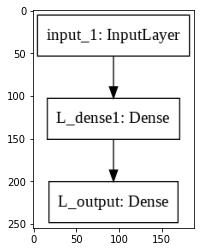

----Display Weights----
weights shape (30, 1)
bias shape (1,)
[-0.06930849]
[0.]
Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8579 - val_loss: 0.6115
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5485 - val_loss: 0.4705
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4621 - val_loss: 0.4287
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4336 - val_loss: 0.4158
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4265 - val_loss: 0.4066
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4150 - val_loss: 0.4056
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4099 - val_loss: 0.4007
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4211 - val_loss: 0.4000
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4033 - val_loss: 0.3994
Epoch 10/30
363/363

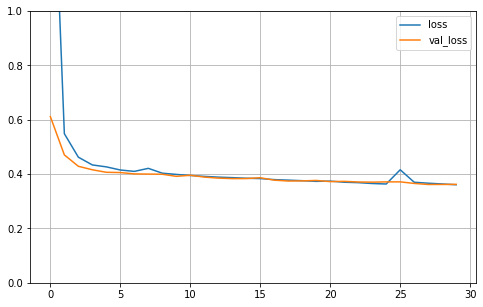

----Plotting Loss----
----Evaluating Model----
Model evaluation on test set:
Test loss: 0.36272722482681274
----Predicting Model----
Probability from Model:
[[1.88]
 [1.  ]
 [4.02]
 [0.79]
 [3.  ]]
Label data:
[1.731   1.014   5.00001 0.697   5.     ]


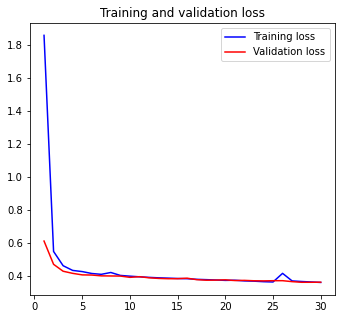

In [11]:
main()